In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Analysis of pcr duplicate ratio

Mean: 60.3699398286973
Median: 60.93102228138261


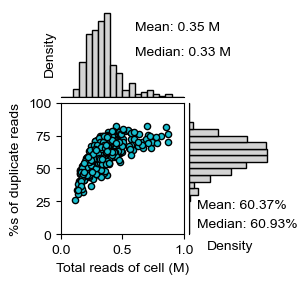

In [2]:
dat = pd.read_csv("results/NanoStrand-seq.qc_pass.csv")
dat["DupRatio"] = 1 - dat["UniqReads"] / dat["TotalReads"]

xs = dat["TotalReads"] / 1e6
ys = dat["DupRatio"] * 100
print("Mean:", np.mean(ys))
print("Median:", np.median(ys))

fig = plt.figure(figsize=(3, 3))
gs = fig.add_gridspec(2, 2, width_ratios=(1.5, 1), height_ratios=(1, 1.5),
                      left=0.2, right=0.9, bottom=0.15, top=0.9,
                      wspace=0.05, hspace=0.05)
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0])
ax_histy = fig.add_subplot(gs[1, 1])
ax_histx.set_facecolor("none")

plt.sca(ax)
plt.scatter(xs, ys, marker="o", s=20, color="C9", edgecolor="black", lw=1)
plt.xlabel("Total reads of cell (M)")
plt.ylabel("%s of duplicate reads")
plt.xlim(0, 1)
plt.ylim(0, 100)

plt.sca(ax_histx)
r = plt.hist(xs, range=(0, 1), bins=20, color="lightgrey", edgecolor="black")
ymax = max(r[0])
plt.text(0.6, ymax * 0.8, "Mean: %.2f M" % np.mean(xs))
plt.text(0.6, ymax * 0.5, "Median: %.2f M" % np.median(xs))
plt.xlim(0, 1)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.ylabel("Density")
plt.xticks([])
plt.yticks([])

plt.sca(ax_histy)
r = plt.hist(ys, range=(0, 100), bins=20, color="lightgrey", edgecolor="black", orientation="horizontal")
xmax = max(r[0])
plt.text(xmax * 0.1, 20, "Mean: %.2f%%" % np.mean(ys))
plt.text(xmax * 0.1, 5, "Median: %.2f%%" % np.median(ys))
plt.ylim(0, 100)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xlabel("Density")
plt.xticks([])
plt.yticks([])

plt.savefig("figures/total_reads_and_duplicate_ratio.pdf", dpi=300)

## Simulative data

In [3]:
np.random.seed(0)
xs = []
ys = []
for n in range(1, 10000):
    vs = [int(v) for v in np.random.rand(n) * 100]
    n1 = len(set(vs))
    r1 = n1 / n
    r2 = 1 - r1
    xs.append(n)
    ys.append(r2)

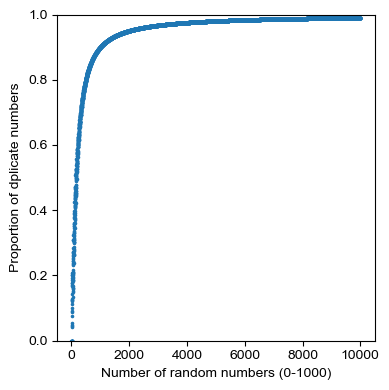

In [4]:
plt.figure(figsize=(4, 4))
plt.scatter(xs, ys, marker=".", s=10)
plt.xlabel("Number of random numbers (0-1000)")
plt.ylabel("Proportion of dplicate numbers")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

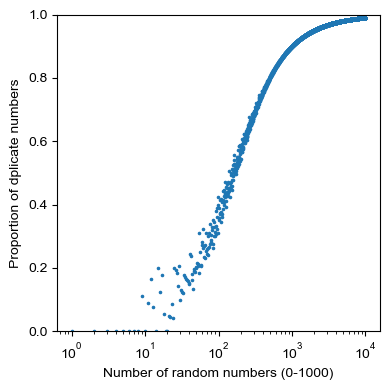

In [5]:
plt.figure(figsize=(4, 4))
plt.scatter(xs, ys, marker=".", s=10)
plt.xlabel("Number of random numbers (0-1000)")
plt.ylabel("Proportion of dplicate numbers")
plt.ylim(0, 1)
plt.xscale("log")
plt.tight_layout()
plt.show()